In [24]:
import import_ipynb
%run Crime_Data.ipynb

import matplotlib.pyplot as plt

[
    {
        "area": "03",
        "area_name": "Southwest",
        "crm_cd": "624",
        "crm_cd_1": "624",
        "crm_cd_desc": "BATTERY - SIMPLE ASSAULT",
        "date_occ": "2020-01-08T00:00:00.000",
        "date_rptd": "2020-01-08T00:00:00.000",
        "dr_no": "010304468",
        "lat": "34.0141",
        "location": "1100 W  39TH                         PL",
        "lon": "-118.2978",
        "mocodes": "0444 0913",
        "part_1_2": "2",
        "premis_cd": "501",
        "premis_desc": "SINGLE FAMILY DWELLING",
        "rpt_dist_no": "0377",
        "status": "AO",
        "status_desc": "Adult Other",
        "time_occ": "2230",
        "vict_age": "36",
        "vict_descent": "B",
        "vict_sex": "F",
        "weapon_desc": "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",
        "weapon_used_cd": "400"
    },
    {
        "area": "01",
        "area_name": "Central",
        "crm_cd": "624",
        "crm_cd_1": "624",
        "crm_cd_desc": "BATTERY 

In [25]:
# DataFrame 
crime_data_df = pd.DataFrame(results_df)

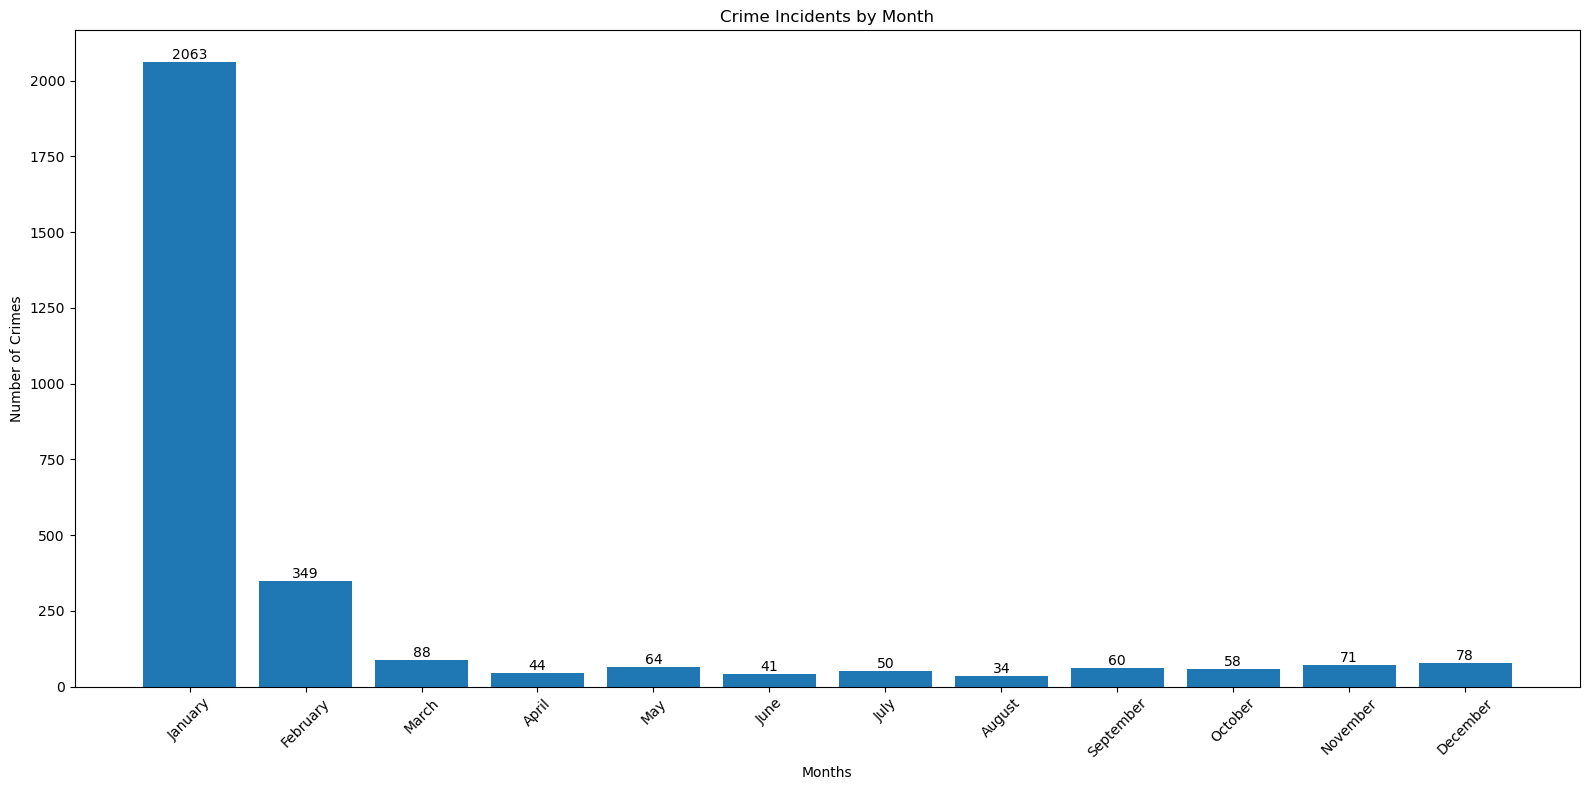

In [28]:
# Convert the "date_occ" column to datetime format
results_df["date_occ"] = pd.to_datetime(results_df["date_occ"])

# Extract the month from the "date_occ" column
results_df["month"] = results_df["date_occ"].dt.month

# Group the data by month and get the count of crimes for each month
crime_count_by_month = results_df["month"].value_counts().sort_index()

# Create a list of month names for labeling the x-axis
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plot the bar graph
plt.figure(figsize=(16, 8))
bars = plt.bar(crime_count_by_month.index, crime_count_by_month.values)
plt.xticks(crime_count_by_month.index, month_names, rotation=45)
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.title("Crime Incidents by Month")

# Add text annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha="center", va="bottom")

plt.tight_layout()
plt.show()

# Do analysis why Jan is so high and when did LA o into COVID lockdown? 

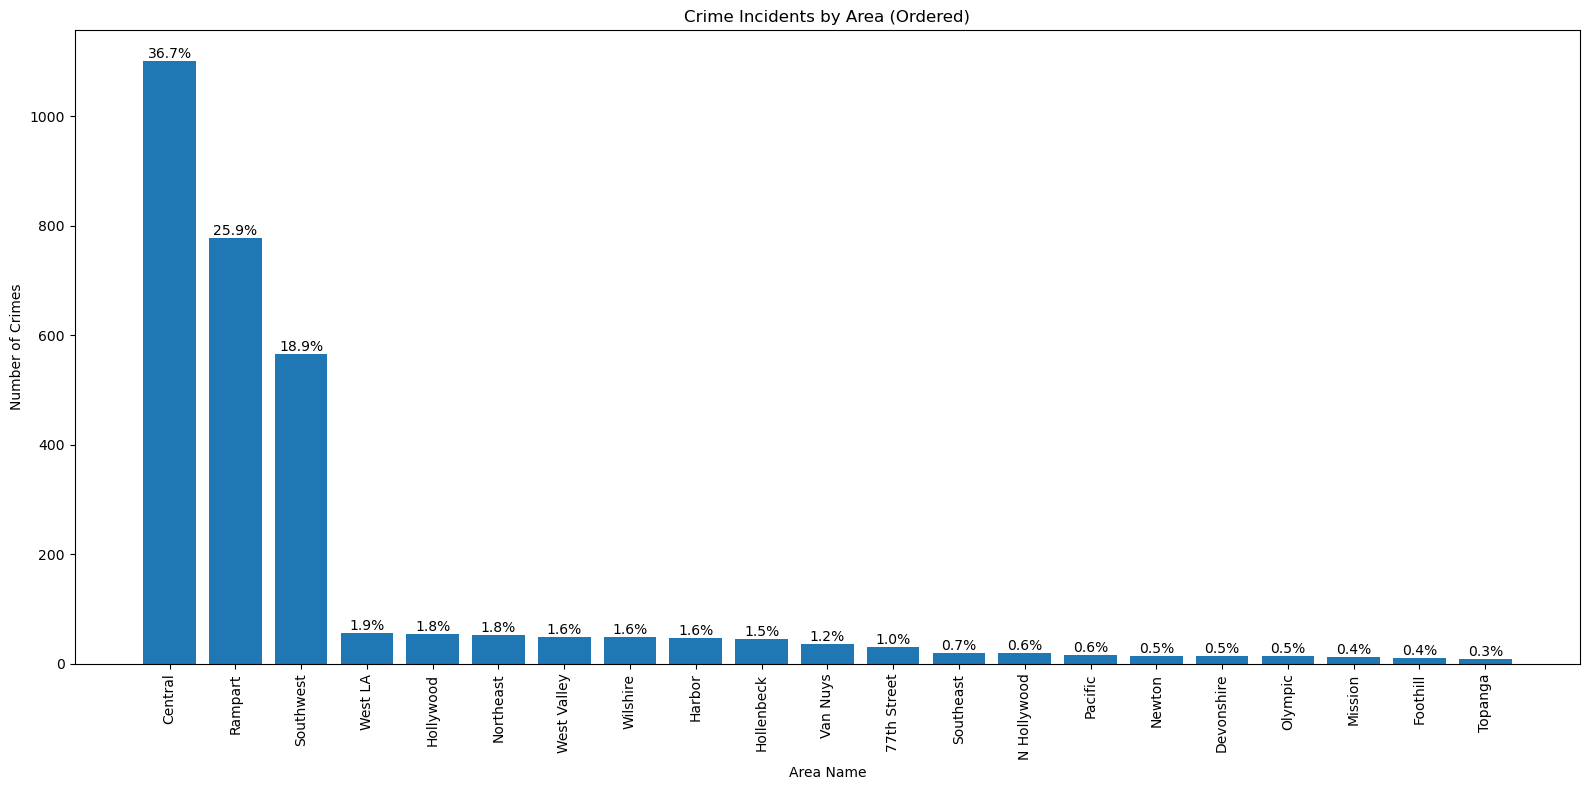

In [29]:
# Group the data by "area_name" and get the total count of crimes for each area
crime_count_by_area = results_df["area_name"].value_counts()

# Sort the data by area name in descending order of crime count
crime_count_by_area = crime_count_by_area.sort_values(ascending=False)

# Calculate the total number of crimes
total_crimes = crime_count_by_area.sum()

# Calculate the percentage of crimes for each area
crime_percentage = (crime_count_by_area / total_crimes) * 100

# Plot the bar chart
plt.figure(figsize=(16, 8))
bars = plt.bar(crime_count_by_area.index, crime_count_by_area.values)
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.title("Crime Incidents by Area (Ordered)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add percentage labels on top of each bar
for bar, percent in zip(bars, crime_percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percent:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

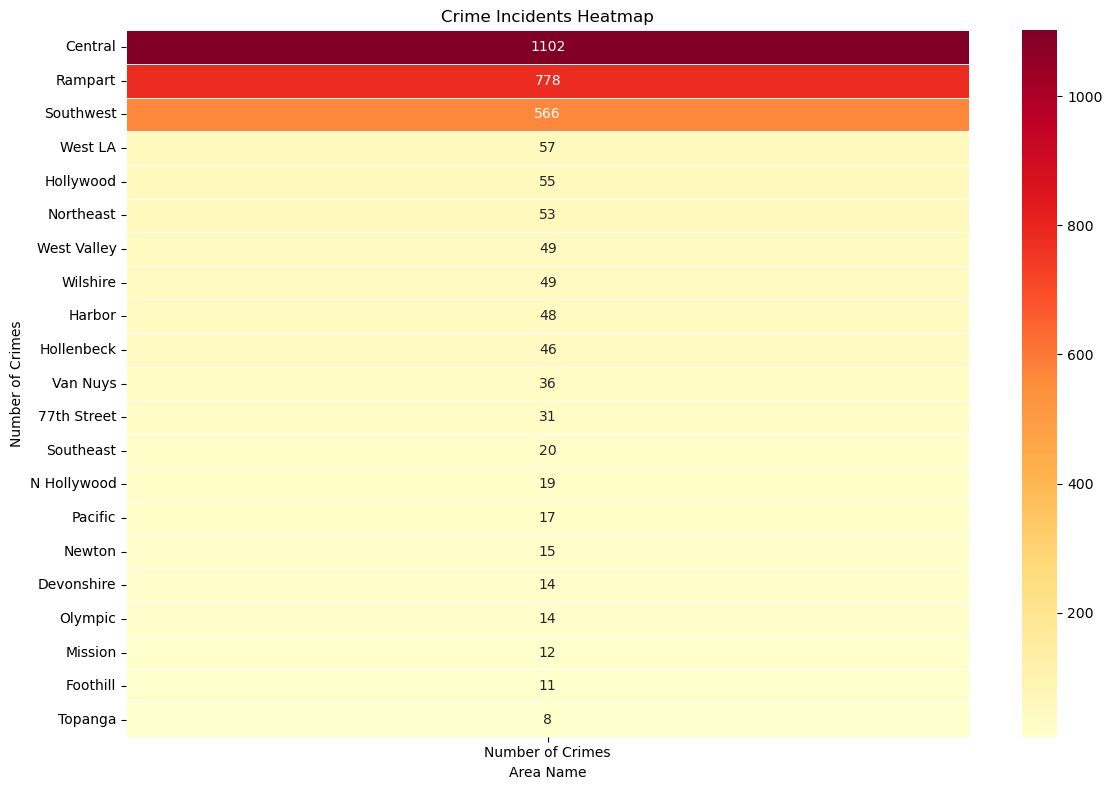

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already defined as "results_df" with an "area_name" column

# Group the data by "area_name" and get the total count of crimes for each area
crime_count_by_area = results_df["area_name"].value_counts()

# Sort the data by area name in descending order of crime count
crime_count_by_area = crime_count_by_area.sort_values(ascending=False)

# Create a dataframe for heatmap
crime_heatmap_df = pd.DataFrame({"Number of Crimes": crime_count_by_area.values}, index=crime_count_by_area.index)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_df, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5)
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.title("Crime Incidents Heatmap")
plt.tight_layout()
plt.show()

In [36]:
import hvplot.pandas
import pandas as pd
import requests
import json
import folium  # For creating a map
from geopy.geocoders import Nominatim  # For converting address to latitude and longitude

# Import API key
from api_keys import geoapify_key

# Set up Geoapify API key
api_key = geoapify_key

In [37]:
import folium
import numpy as np
import pandas as pd
from IPython.display import display

# Example data for demonstration purposes
data = {
    'Date Occurred': ['2023-08-01', '2023-08-02', '2023-08-03'],
    'lat': [34.05, 34.06, 34.07],
    'lon': [-118.25, -118.24, -118.23],
    'Street No_Name': ['Street A', 'Street B', 'Street C']
}
results_df = pd.DataFrame(data)

# Drop rows with non-finite (NaN or infinity) values in the lat and lon columns
crime_data_df = pd.DataFrame(results_df)
crime_data_cleaned = crime_data_df.dropna(subset=['lat', 'lon']).replace([np.inf, -np.inf], np.nan).dropna()

# Create a map centered at Los Angeles
map_center = [34.0522, -118.2437]
map_LA = folium.Map(location=map_center, zoom_start=11)

# Loop through the DataFrame to add markers for each crime incident
for index, row in crime_data_cleaned.iterrows():
    # Extract data for each incident
    date_occ = row['Date Occurred']
    lat = float(row['lat'])
    lon = float(row['lon'])
    location = row['Street No_Name']

    # Create a popup message for the marker, including the date of occurrence
    popup_msg = f"Date Occurred: {date_occ}<br>Location: {location}"

    # Add a marker for the incident on the map
    folium.Marker(
        location=[lat, lon],
        popup=popup_msg,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map_LA)

# Display the map in the Jupyter Notebook
display(map_LA)

